## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [1]:
import pandas as pd
from pathlib import Path
import numpy as np

%matplotlib inline 

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [2]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path('./Resources/bitstamp.csv')
# For the ease of coding,BS=Bitstamp
bs = pd.read_csv(
    csvpath, 
    index_col='Timestamp', 
    parse_dates=True, 
    infer_datetime_format=True
)

### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [3]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
display(bs.head())
display(bs.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2019-01-07 23:55:00,3977.81,3977.81,3977.81,$3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:56:00,NaN,NaN,NaN,$nan,NaN,NaN,NaN
2019-01-07 23:57:00,3977.81,3984.40,3977.81,$3984.4,8.907403,35464.870894,3981.504964
2019-01-07 23:58:00,3980.97,3980.97,3980.97,$3980.97,1.615929,6432.963358,3980.970000
2019-01-07 23:59:00,3979.07,3983.52,3979.07,$3983.52,1.920004,7643.937878,3981.209496


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [4]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
csvpath = Path('./Resources/coinbase.csv')
# For the ease of coding, cb=coinbase
cb = pd.read_csv(
    csvpath, 
    index_col='Timestamp', 
    parse_dates=True, 
    infer_datetime_format=True
)

In [5]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
display(cb.head())
display(cb.tail())

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001


,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2019-01-07 17:02:00,4006.01,4006.57,4006.00,$4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,$4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,$4006.01,1.192123,4775.647308,4006.003635
2019-01-07 17:05:00,4006.01,4006.01,4005.50,$4005.5,2.699700,10814.241898,4005.719991
2019-01-07 17:06:00,4005.51,4006.01,4005.51,$4005.99,1.752778,7021.183546,4005.745614


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [6]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bs.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,$430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,$430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,$431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,$430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,$432.52,4.117318,1776.650476,431.506725
...,...,...,...,...,...,...,...
2019-01-07 23:54:00,3980.50,3981.00,3980.22,$3980.33,8.043889,32017.759767,3980.383250
2019-01-07 23:55:00,3977.81,3977.81,3977.81,$3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:57:00,3977.81,3984.40,3977.81,$3984.4,8.907403,35464.870894,3981.504964


In [7]:
bs.isnull().sum()

Open              238200
High              238200
Low               238200
Close                  0
BTC Volume        238200
USD Volume        238200
Weighted Price    238200
dtype: int64

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bs.loc[:,'Close'] = bs.loc[:,'Close'].str.replace('$','')


In [9]:
bs['Close'].dtypes

dtype('O')

### Step 3: Convert the data type of the Close column to a `float`.

In [10]:
# Convert the Close data type to a float
bs.loc[:,'Close'] = bs.loc[:,'Close'].astype('float')

### Step 4: Review the data for duplicated values, and drop them if necessary.

In [11]:
# Review the data for duplicate values, and drop them if necessary
bs.duplicated().sum()

240846

In [12]:
bs.drop_duplicates()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
...,...,...,...,...,...,...,...
2019-01-07 23:54:00,3980.50,3981.00,3980.22,3980.33,8.043889,32017.759767,3980.383250
2019-01-07 23:55:00,3977.81,3977.81,3977.81,3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:57:00,3977.81,3984.40,3977.81,3984.40,8.907403,35464.870894,3981.504964


In [13]:
bs.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.89,430.89,430.89,430.89,0.080631,34.743096,430.890000
2015-12-31 19:02:00,430.89,430.89,430.89,430.89,0.143257,61.728095,430.890000
2015-12-31 19:04:00,430.19,431.06,430.19,431.06,1.032161,444.627575,430.773269
2015-12-31 19:05:00,431.06,432.11,430.21,430.54,5.558156,2397.461993,431.341280
2015-12-31 19:06:00,432.53,432.53,431.48,432.52,4.117318,1776.650476,431.506725
...,...,...,...,...,...,...,...
2019-01-07 23:54:00,3980.50,3981.00,3980.22,3980.33,8.043889,32017.759767,3980.383250
2019-01-07 23:55:00,3977.81,3977.81,3977.81,3977.81,0.008042,31.988752,3977.810000
2019-01-07 23:57:00,3977.81,3984.40,3977.81,3984.40,8.907403,35464.870894,3981.504964


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [14]:
# Repeat Steps 1–4 for the coinbase DataFrame
# For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
cb.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,$430.4,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,$430.4,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,$430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,$430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,$430.96,12.114161,5216.297064,430.595001
...,...,...,...,...,...,...,...
2019-01-07 17:02:00,4006.01,4006.57,4006.00,$4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,$4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,$4006.01,1.192123,4775.647308,4006.003635


In [15]:
cb.isnull().sum()

Open              38059
High              38059
Low               38059
Close                 0
BTC Volume        38059
USD Volume        38059
Weighted Price    38059
dtype: int64

In [16]:
# Use the str.replace function to remove the dollar sign, $

In [17]:
cb.loc[:,'Close'] = cb.loc[:,'Close'].str.replace('$', '') 

In [18]:
cb['Close'].dtypes

dtype('O')

In [19]:
# Convert the Close data type to a float
cb.loc[:,'Close'] = cb.loc[:,'Close'].astype('float')

In [20]:
cb['Close'].dtypes

dtype('float64')

In [21]:
# Review the data for duplicate values, and drop them if necessary
cb.duplicated().sum()

38682

In [22]:
cb.drop_duplicates()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001
...,...,...,...,...,...,...,...
2019-01-07 17:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635


In [23]:
cb.dropna()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2015-12-31 19:01:00,430.38,430.40,430.38,430.40,0.947800,407.924370,430.390768
2015-12-31 19:02:00,430.40,430.40,430.40,430.40,1.633400,703.015360,430.400000
2015-12-31 19:03:00,430.39,430.39,430.36,430.36,12.566300,5408.313368,430.382322
2015-12-31 19:04:00,430.39,430.39,430.39,430.39,1.953000,840.551670,430.390000
2015-12-31 19:05:00,430.40,430.96,430.40,430.96,12.114161,5216.297064,430.595001
...,...,...,...,...,...,...,...
2019-01-07 17:02:00,4006.01,4006.57,4006.00,4006.01,3.382954,13553.433078,4006.390309
2019-01-07 17:03:00,4006.01,4006.57,4006.00,4006.01,0.902164,3614.083169,4006.017233
2019-01-07 17:04:00,4006.01,4006.01,4006.00,4006.01,1.192123,4775.647308,4006.003635


## Analyze the Data

Your analysis consists of the following steps:

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [24]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bs_close = bs.loc[:,['Close']]

# Review the first five rows of the DataFrame
bs_close.head()


,Close
Timestamp,
2015-12-31 19:01:00,430.89
2015-12-31 19:02:00,430.89
2015-12-31 19:03:00,NaN
2015-12-31 19:04:00,431.06
2015-12-31 19:05:00,430.54


In [25]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
cb_close = cb.loc[:,['Close']]

# Review the first five rows of the DataFrame
cb_close.head()


,Close
Timestamp,
2015-12-31 19:01:00,430.40
2015-12-31 19:02:00,430.40
2015-12-31 19:03:00,430.36
2015-12-31 19:04:00,430.39
2015-12-31 19:05:00,430.96


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [26]:
# Generate the summary statistics for the bitstamp DataFrame
bs_close.describe()


,Close
count,1.350419e+06
mean,4.496885e+03
std,3.955763e+03
min,1.500000e+00
25%,7.849200e+02
50%,3.781800e+03
75%,6.923000e+03
max,1.966575e+04


In [27]:
# Generate the summary statistics for the coinbase DataFrame
cb_close.describe()


,Close
count,1.550147e+06
mean,4.090615e+03
std,3.913308e+03
min,6.000000e-02
25%,6.751800e+02
50%,2.709800e+03
75%,6.592835e+03
max,1.989199e+04


<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timestamp'>

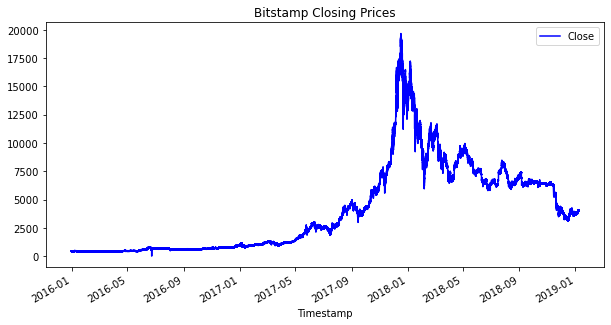

In [28]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bs_close.plot(
    figsize=(10,5),
    title='Bitstamp Closing Prices',
    color='blue'
)


<AxesSubplot:title={'center':'Coinbase Closing Prices'}, xlabel='Timestamp'>

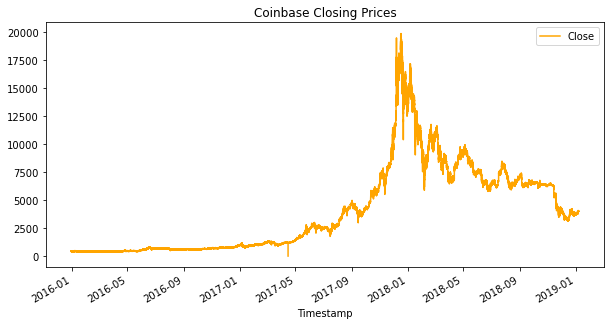

In [29]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
cb_close.plot(
    figsize=(10,5),
    title='Coinbase Closing Prices',
    color='orange'
)


<AxesSubplot:title={'center':'Closing Prices: Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

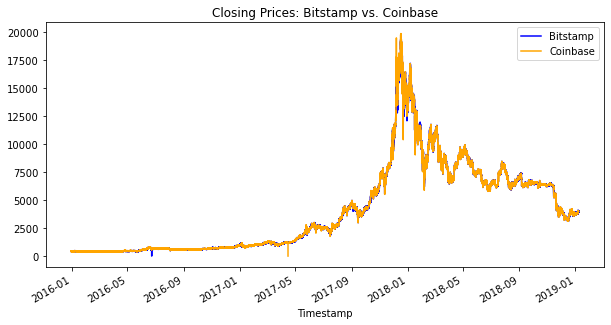

In [30]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bs_close['Close'].plot(
    figsize=(10,5),
    title='Closing Prices: Bitstamp vs. Coinbase',
    color='blue',
    label='Bitstamp',
    legend=True
)

cb_close['Close'].plot(
    figsize=(10,5),
    color='orange',
    label='Coinbase',
    legend=True
)



<AxesSubplot:title={'center':'January 2016 Closing Prices: Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

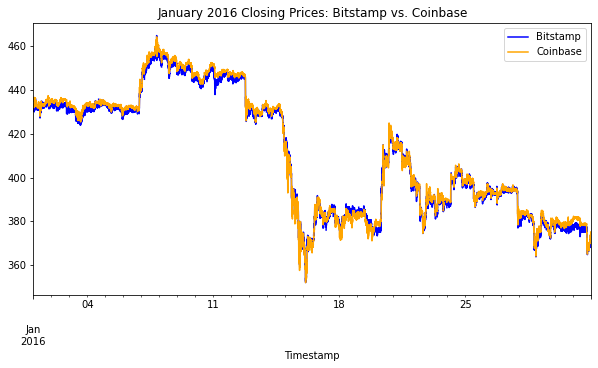

In [31]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label

bs_close['Close'].loc['2016-01'].plot(
    figsize=(10,5),
    title='January 2016 Closing Prices: Bitstamp vs. Coinbase',
    color='blue',
    label='Bitstamp',
    legend=True
)

cb_close['Close'].loc['2016-01'].plot(
    figsize=(10,5),
    color='orange',
    label='Coinbase',
    legend=True
)


<AxesSubplot:title={'center':'December 2018 Closing Prices: Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

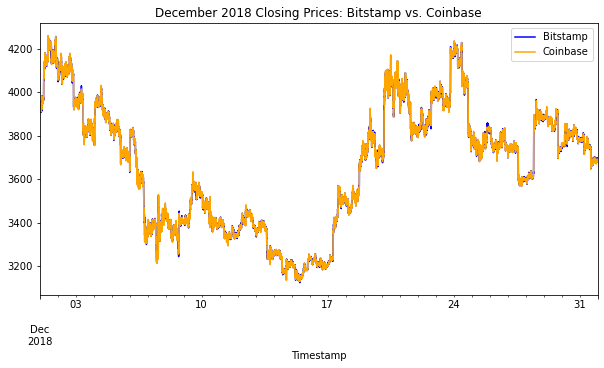

In [32]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 

bs_close['Close'].loc['2018-12'].plot(
    figsize=(10,5),
    title='December 2018 Closing Prices: Bitstamp vs. Coinbase',
    color='blue',
    label='Bitstamp',
    legend=True
)

cb_close['Close'].loc['2018-12'].plot(
    figsize=(10,5),
    color='orange',
    label='Coinbase',
    legend=True
)


**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes.  In January 2016, you can see Bitstamp(blue)line intermittently behind Coinbase(orange) line.  But in December 2018, the Bitstamp line is almost invisible, meaning extremely close prices on both exchanges.

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the last year of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'January 31, 2016 Closing Prices: Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

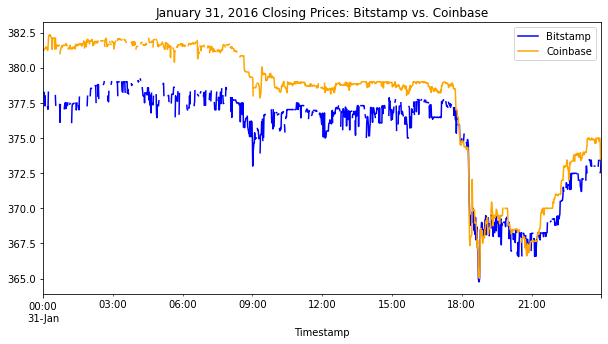

In [33]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bs_close['Close'].loc['2016-01-31'].plot(
    figsize=(10,5),
    title='January 31, 2016 Closing Prices: Bitstamp vs. Coinbase',
    color='blue',
    label='Bitstamp',
    legend=True
)

cb_close['Close'].loc['2016-01-31'].plot(
    figsize=(10,5),
    color='orange',
    label='Coinbase',
    legend=True
)


In [34]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = cb_close['Close'].loc['2016-01-31'] - bs_close['Close'].loc['2016-01-31']

# Generate summary statistics for the early DataFrame

arbitrage_spread_early.describe()


count    895.000000
mean       2.034179
std        1.374623
min       -2.100000
25%        1.265000
50%        1.880000
75%        3.140000
max        6.240000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spreade on January 31, 2016'}, xlabel='Timestamp'>

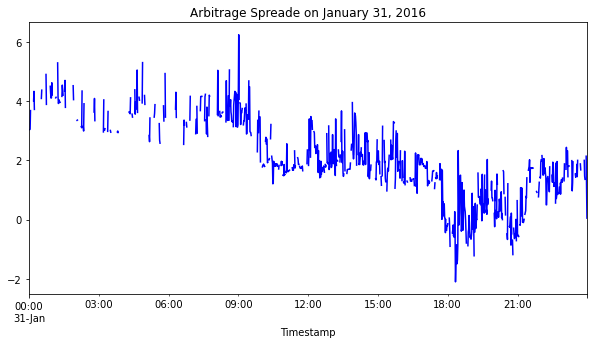

In [35]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# Be sure to include at least a title with your plot

arbitrage_spread_early.plot(
    figsize=(10,5),
    title='Arbitrage Spreade on January 31, 2016',
    color='blue'
)


<AxesSubplot:title={'center':'January 31, 2017 Closing Prices: Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

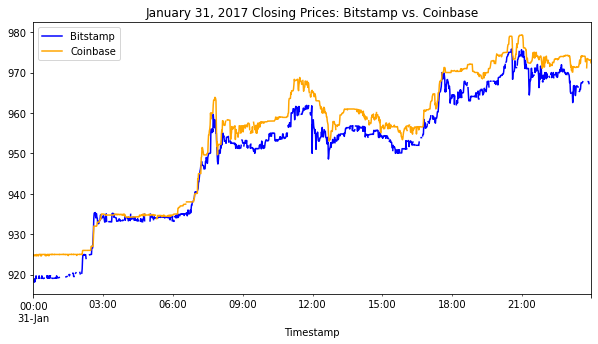

In [36]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bs_close['Close'].loc['2017-01-31'].plot(
    figsize=(10,5),
    title='January 31, 2017 Closing Prices: Bitstamp vs. Coinbase',
    color='blue',
    label='Bitstamp',
    legend=True
)

cb_close['Close'].loc['2017-01-31'].plot(
    figsize=(10,5),
    color='orange',
    label='Coinbase',
    legend=True
)


In [37]:
# Using the date form the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = cb_close['Close'].loc['2017-01-31'] - bs_close['Close'].loc['2017-01-31']

# Generate summary statistics for the middle DataFrame
arbitrage_spread_middle.describe()


count    1146.000000
mean        3.760698
std         2.266972
min        -3.360000
25%         2.235000
50%         3.950000
75%         5.310000
max        15.590000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spreade on January 31, 2017'}, xlabel='Timestamp'>

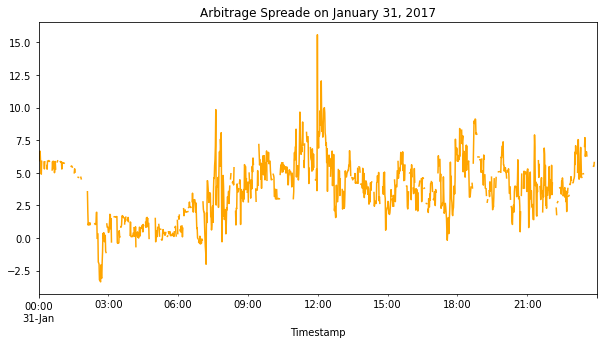

In [38]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# Be sure to include at least a title with your plot

arbitrage_spread_middle.plot(
    figsize=(10,5),
    title='Arbitrage Spreade on January 31, 2017',
    color='orange'
)


<AxesSubplot:title={'center':'December 23, 2018 Closing Prices: Bitstamp vs. Coinbase'}, xlabel='Timestamp'>

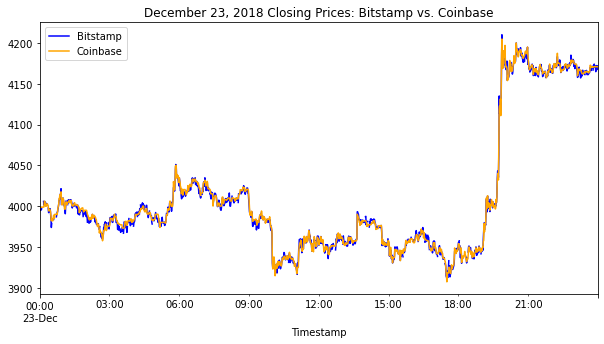

In [39]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 

bs_close['Close'].loc['2018-12-23'].plot(
    figsize=(10,5),
    title='December 23, 2018 Closing Prices: Bitstamp vs. Coinbase',
    color='blue',
    label='Bitstamp',
    legend=True
)

cb_close['Close'].loc['2018-12-23'].plot(
    figsize=(10,5),
    color='orange',
    label='Coinbase',
    legend=True
)


In [40]:
# Using th date from late in the dataset that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = cb_close['Close'].loc['2018-12-23'] - bs_close['Close'].loc['2018-12-23']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()


count    1323.000000
mean        0.583870
std         3.264919
min       -16.180000
25%        -1.450000
50%         0.440000
75%         2.735000
max        18.560000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spreade on January 31, 2017'}, xlabel='Timestamp'>

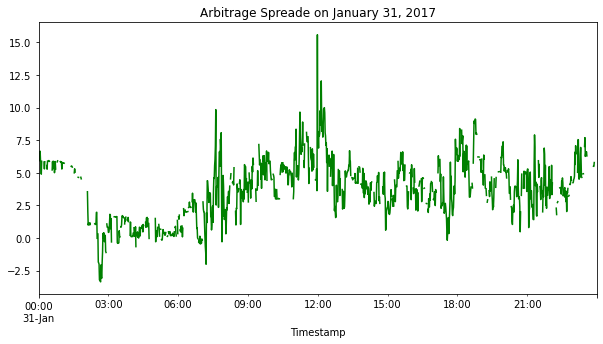

In [41]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# Be sure to include at least a title with your plot

arbitrage_spread_middle.plot(
    figsize=(10,5),
    title='Arbitrage Spreade on January 31, 2017',
    color='green'
)


### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

In [42]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = cb_close['Close'].loc['2016-01-31'] - bs_close['Close'].loc['2016-01-31']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
early_filter = arbitrage_spread_early > 0
arbitrage_spread_early.loc[early_filter].describe()


count    815.000000
mean       2.280466
std        1.175386
min        0.010000
25%        1.480000
50%        1.960000
75%        3.260000
max        6.240000
Name: Close, dtype: float64

In [43]:
# For the from the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = cb_close['Close'].loc['2017-01-31'] - bs_close['Close'].loc['2017-01-31']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
middle_filter = arbitrage_spread_middle > 0
arbitrage_spread_middle.loc[middle_filter].describe()


count    1101.000000
mean        3.952879
std         2.088315
min         0.010000
25%         2.440000
50%         4.070000
75%         5.390000
max        15.590000
Name: Close, dtype: float64

In [44]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = cb_close['Close'].loc['2018-12-23'] - bs_close['Close'].loc['2018-12-23']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
late_filter = arbitrage_spread_late > 0
arbitrage_spread_late.loc[late_filter].describe()


count    747.000000
mean       2.786091
std        2.143602
min        0.010000
25%        1.150000
50%        2.400000
75%        3.970000
max       18.560000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [45]:
# For the date early in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0) by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_early = arbitrage_spread_early[arbitrage_spread_early>0]/bs_close['Close'].loc['2016-01-31']

# Review the spread return DataFrame
spread_return_early = spread_return_early.dropna()
spread_return_early.head()


Timestamp
2016-01-31 00:02:00    0.008037
2016-01-31 00:03:00    0.008063
2016-01-31 00:04:00    0.009746
2016-01-31 00:06:00    0.008968
2016-01-31 00:09:00    0.009476
Name: Close, dtype: float64

In [46]:
# For the date in the middle of the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle>0]/bs_close['Close'].loc['2017-01-31']

# Review the spread return DataFrame
spread_return_middle = spread_return_middle.dropna()
spread_return_middle.head()


Timestamp
2017-01-31 00:00:00    0.007329
2017-01-31 00:02:00    0.007199
2017-01-31 00:03:00    0.006443
2017-01-31 00:04:00    0.007253
2017-01-31 00:05:00    0.006464
Name: Close, dtype: float64

In [47]:
# For the date late in the dataset, calculate the spread returns by dividing 
# the instances when the arbitrage spread is positive (> 0)  by the price of Bitcoin 
# from the exchange you are buying on (the lower-priced exchange)
spread_return_late = arbitrage_spread_late[arbitrage_spread_late>0]/bs_close['Close'].loc['2018-12-23']

# Review the spread return DataFrame
spread_return_late = spread_return_late.dropna()
spread_return_late.head()

Timestamp
2018-12-23 00:00:00    0.000606
2018-12-23 00:01:00    0.000606
2018-12-23 00:02:00    0.000403
2018-12-23 00:03:00    0.000548
2018-12-23 00:04:00    0.000859
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [48]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early>0.01]

# Review the first five profitable trades
profitable_trades_early.head()


Timestamp
2016-01-31 00:12:00    0.010631
2016-01-31 00:13:00    0.011484
2016-01-31 00:19:00    0.013197
2016-01-31 00:22:00    0.012507
2016-01-31 00:28:00    0.011998
Name: Close, dtype: float64

In [49]:
# For the date in the middle of the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle>0.01]

# Review the first five profitable trades
profitable_trades_middle.head()


Timestamp
2017-01-31 07:37:00    0.010367
2017-01-31 11:14:00    0.010080
2017-01-31 11:59:00    0.016410
2017-01-31 12:06:00    0.010220
2017-01-31 12:08:00    0.010514
Name: Close, dtype: float64

In [50]:
# For the date late in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late>0.01]

# Review the first five profitable trades
profitable_trades_late.head()


Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [51]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()


count    108.000000
mean       0.011299
std        0.001039
min        0.010029
25%        0.010609
50%        0.011049
75%        0.011589
max        0.016729
Name: Close, dtype: float64

In [52]:
# For the date in the middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

profitable_trades_middle.describe()


count    10.000000
mean      0.011152
std       0.001997
min       0.010071
25%       0.010243
50%       0.010372
75%       0.010509
max       0.016410
Name: Close, dtype: float64

In [53]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%

profitable_trades_late.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [54]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bs_close['Close'].loc['2016-01-31']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early.head()

Timestamp
2016-01-31 00:12:00    4.01
2016-01-31 00:13:00    4.33
2016-01-31 00:19:00    4.98
2016-01-31 00:22:00    4.72
2016-01-31 00:28:00    4.53
Name: Close, dtype: float64

In [55]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bs_close['Close'].loc['2017-01-31']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the early profit DataFrame
profit_per_trade_middle.head()


Timestamp
2017-01-31 07:37:00     9.85
2017-01-31 11:14:00     9.66
2017-01-31 11:59:00    15.59
2017-01-31 12:06:00     9.76
2017-01-31 12:08:00    10.03
Name: Close, dtype: float64

In [56]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bs_close['Close'].loc['2018-12-23']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late.head()


Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [57]:
# Generate the summary statistics for the early profit per trade DataFrame

profit_per_trade_early.describe()

count    108.000000
mean       4.258148
std        0.386956
min        3.770000
25%        4.002500
50%        4.165000
75%        4.372500
max        6.240000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade on January 31, 2016'}, xlabel='Timestamp'>

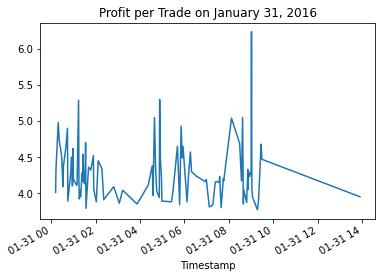

In [58]:
# Plot the results for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
profit_per_trade_early.plot(title='Profit per Trade on January 31, 2016')


In [59]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

count    10.000000
mean     10.626000
std       1.883538
min       9.600000
25%       9.777500
50%       9.870000
75%      10.022500
max      15.590000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade on January 31, 2017'}, xlabel='Timestamp'>

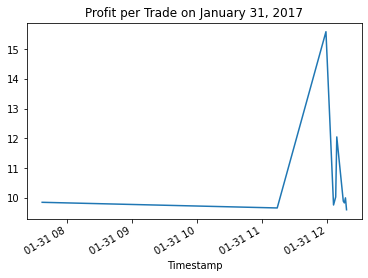

In [60]:
# Plot the results for the middle profit per trade DataFrame
# Be sure to include at least a title with your plot

profit_per_trade_middle.plot(title='Profit per Trade on January 31, 2017')

In [61]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Profit per Trade on December 23, 2018'}, xlabel='Timestamp'>

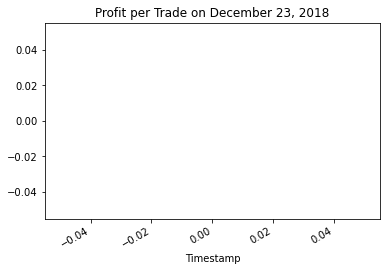

In [62]:
# Plot the results for the late profit per trade DataFrame
# Be sure to include at least a title with your plot

profit_per_trade_late.plot(title='Profit per Trade on December 23, 2018')


#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [63]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_per_trade_early.sum()


459.8799999999998

In [64]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_per_trade_middle.sum()


106.25999999999999

In [65]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_per_trade_late.sum()


0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [66]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()


<AxesSubplot:title={'center':'Cumulative Profit on January 31, 2016'}, xlabel='Timestamp'>

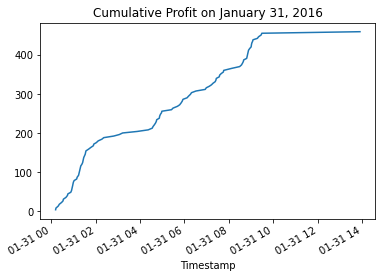

In [67]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot
cumulative_profit_early.plot(title='Cumulative Profit on January 31, 2016')

In [68]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()

<AxesSubplot:title={'center':'Cumulative Profit on January 31, 2017'}, xlabel='Timestamp'>

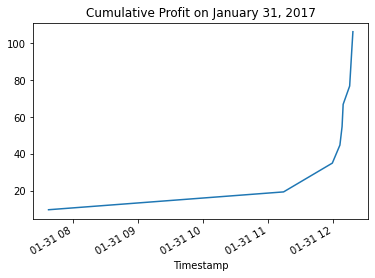

In [69]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot

cumulative_profit_middle.plot(title='Cumulative Profit on January 31, 2017')

In [70]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative Profit on December 23, 2018'}, xlabel='Timestamp'>

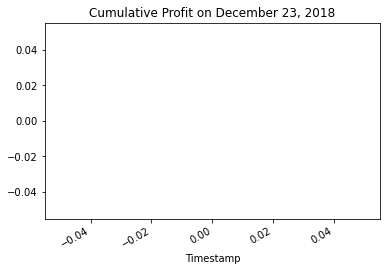

In [71]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# Be sure to include at least a title with your plot

cumulative_profit_late.plot(title='Cumulative Profit on December 23, 2018')

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** Arbitrage profits are extremely hard to come by at the market for Bitcoin matures across time. As Bitcoin grows in populatiry, the prices across the two exhanges trade more in line with one another. That makes is very difficult find a point where the price difference exceeds the minimum profit threshold of 1%.